# Employee data Preprocessing

The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [8]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importing the dataset

In [9]:
df = pd.read_csv("employee.csv")
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [10]:
df.tail(10)

,Company,Age,Salary,Place,Country,Gender
138,CTS,44.0,3033.0,Cochin,India,0
139,Congnizant,22.0,2934.0,Noida,India,0
140,Infosys,44.0,4034.0,Hyderabad,India,0
141,TCS,33.0,5034.0,Calcutta,India,0
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [ ]:
shap of the dataset

In [5]:
df.shape

(148, 6)

no of elements

In [6]:
df.size

888

# Data Exploration

Display basic information about the dataset

In [7]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Analysing the unique values and their count for each feature¶

In [15]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique values in the column ",i ," :",df[i].unique())
    print("Length of unique values in the column ",i," is " ,len(df[i].unique()))
    print("\n")

Name of column :  Company
Unique values in the column  Company  : ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in the column  Company  is  7


Name of column :  Age
Unique values in the column  Age  : [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in the column  Age  is  30


Name of column :  Salary
Unique values in the column  Salary  : [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in the column  Salary  is  41


Name of column :  Place
Unique values in the column  Place  : ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of u

Rename columns

In [17]:
print(df.columns)

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [18]:
df = df.rename(columns={
    'Company': 'employer',
    'Age': 'employee_age',
    'Salary': 'annual_salary',
    'Place': 'work_location',
    'Country': 'work_country',
    'Gender': 'employee_gender'
})
print(df.columns)

Index(['employer', 'employee_age', 'annual_salary', 'work_location',
       'work_country', 'employee_gender'],
      dtype='object')


# Data Cleaning¶

find the null values

In [19]:
df.isnull().sum()

employer            8
employee_age       18
annual_salary      24
work_location      14
work_country        0
employee_gender     0
dtype: int64

Remove duplicates

In [20]:
df[df.duplicated()]

,employer,employee_age,annual_salary,work_location,work_country,employee_gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [23]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,employer,employee_age,annual_salary,work_location,work_country,employee_gender


In [24]:
df.shape

(144, 6)

4 duplicates values removed

Removing outliners using iqr method

In [26]:
q1,q2,q3=df.employee_age.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["employee_age"]<LW)|(df["employee_age"]>UW)]

25 percentile = 22.0, 50 percentile = 33.0, 75 percentile = 37.5
IQR =  15.5
Lower Whisker = -1.25  Upper Whisker = 60.75


,employer,employee_age,annual_salary,work_location,work_country,employee_gender


In [27]:
q1,q2,q3=df.annual_salary.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df[(df["annual_salary"]<LW)|(df["annual_salary"]>UW)]

25 percentile = 3030.0, 50 percentile = 5000.0, 75 percentile = 8000.0
IQR =  4970.0
Lower Whisker = -4425.0  Upper Whisker = 15455.0


,employer,employee_age,annual_salary,work_location,work_country,employee_gender


Replace the value 0 in age as NaN using replace() function.

In [28]:
print(df[df.employee_age==0])
df['employee_age'].replace(0,np.nan, inplace=True)

    employer  employee_age  annual_salary work_location work_country  \
88   Infosys           0.0         3030.0      Calcutta        India   
92       TCS           0.0         3045.0         Delhi        India   
101      CTS           0.0         2034.0    Podicherry        India   
107      TCS           0.0         9024.0       Chennai        India   
111  Infosys           0.0         3234.0        Mumbai        India   
121      CTS           0.0         1234.0      Calcutta        India   

     employee_gender  
88                 0  
92                 0  
101                0  
107                1  
111                0  
121                0  


C:\Users\user\AppData\Local\Temp\ipykernel_21800\544046268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employee_age'].replace(0,np.nan, inplace=True)


Treat the null values 

In [30]:
print(df)

            employer  employee_age  annual_salary work_location work_country  \
0                TCS          20.0            NaN       Chennai        India   
1            Infosys          30.0            NaN        Mumbai        India   
2                TCS          35.0         2300.0      Calcutta        India   
3            Infosys          40.0         3000.0         Delhi        India   
4                TCS          23.0         4000.0        Mumbai        India   
..               ...           ...            ...           ...          ...   
142  Infosys Pvt Lmt          22.0         8202.0        Mumbai        India   
143              TCS          33.0         9024.0      Calcutta        India   
145          Infosys          44.0         4034.0         Delhi        India   
146              TCS          33.0         5034.0        Mumbai        India   
147          Infosys          22.0         8202.0        Cochin        India   

     employee_gender  
0               

remove rows with null values 

In [35]:
df_dropped = df.dropna()
print("\n after dropping rows with null values:")
print(df_dropped)



 after dropping rows with null values:
            employer  employee_age  annual_salary work_location work_country  \
2                TCS          35.0         2300.0      Calcutta        India   
3            Infosys          40.0         3000.0         Delhi        India   
4                TCS          23.0         4000.0        Mumbai        India   
7            Infosys          23.0         7000.0        Mumbai        India   
8                TCS          34.0         8000.0      Calcutta        India   
..               ...           ...            ...           ...          ...   
142  Infosys Pvt Lmt          22.0         8202.0        Mumbai        India   
143              TCS          33.0         9024.0      Calcutta        India   
145          Infosys          44.0         4034.0         Delhi        India   
146              TCS          33.0         5034.0        Mumbai        India   
147          Infosys          22.0         8202.0        Cochin        India   


replace null values with mean

In [34]:
df_mean = df.fillna(df.mean(numeric_only=True))
print("\n after replacing null values with mean:")
print(df_mean)


 after replacing null values with mean:
            employer  employee_age  annual_salary work_location work_country  \
0                TCS          20.0    5283.471074       Chennai        India   
1            Infosys          30.0    5283.471074        Mumbai        India   
2                TCS          35.0    2300.000000      Calcutta        India   
3            Infosys          40.0    3000.000000         Delhi        India   
4                TCS          23.0    4000.000000        Mumbai        India   
..               ...           ...            ...           ...          ...   
142  Infosys Pvt Lmt          22.0    8202.000000        Mumbai        India   
143              TCS          33.0    9024.000000      Calcutta        India   
145          Infosys          44.0    4034.000000         Delhi        India   
146              TCS          33.0    5034.000000        Mumbai        India   
147          Infosys          22.0    8202.000000        Cochin        India   

# Data Analysis

Filtering data with age>40 and salary<5000

In [48]:
df_filtered = df[(df['employee_age']>40) & (df['annual_salary']<5000)]
df_filtered


,employer,employee_age,annual_salary,work_location,work_country,employee_gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


Plot the chart with age and salary

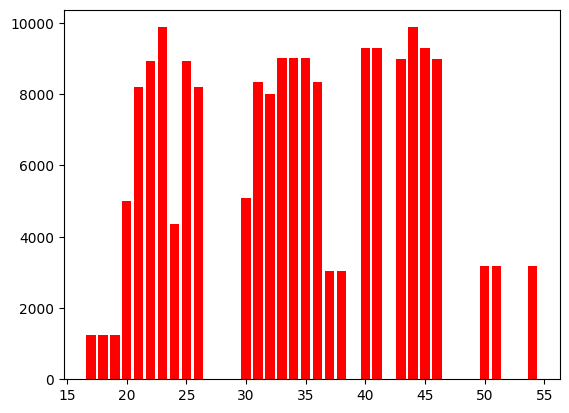

In [51]:
plt.bar(df.employee_age,df.annual_salary,color="red")
plt.show()

Count the number of people from each place and represent it visually

<Axes: xlabel='count', ylabel='work_location'>

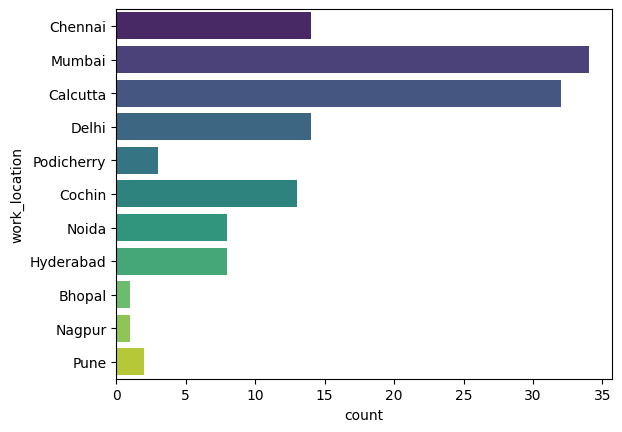

In [57]:
sns.countplot(y='work_location', data=df, palette='viridis', hue='work_location', legend=False)

# Data Encoding:

In [61]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["employer", "work_location"])

print(df_one_hot_encoded )

     employee_age  annual_salary work_country  employee_gender  employer_CTS  \
0            20.0            NaN        India              NaN         False   
1            30.0            NaN        India              NaN         False   
2            35.0         2300.0        India              NaN         False   
3            40.0         3000.0        India              NaN         False   
4            23.0         4000.0        India              NaN         False   
..            ...            ...          ...              ...           ...   
142          22.0         8202.0        India              1.0         False   
143          33.0         9024.0        India              1.0         False   
145          44.0         4034.0        India              1.0         False   
146          33.0         5034.0        India              1.0         False   
147          22.0         8202.0        India              1.0         False   

     employer_Congnizant  employer_Info

# One hot Encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ["employer", "work_location"]
new_encoded_cols_names = []
for col in cols_to_encode:
  new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode]).toarray()
df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)
print(df_one_hot_encoded)

            employer  employee_age  annual_salary work_location work_country  \
0                TCS          20.0            NaN       Chennai        India   
1            Infosys          30.0            NaN        Mumbai        India   
2                TCS          35.0         2300.0      Calcutta        India   
3            Infosys          40.0         3000.0         Delhi        India   
4                TCS          23.0         4000.0        Mumbai        India   
..               ...           ...            ...           ...          ...   
142  Infosys Pvt Lmt          22.0         8202.0        Mumbai        India   
143              TCS          33.0         9024.0      Calcutta        India   
145          Infosys          44.0         4034.0         Delhi        India   
146              TCS          33.0         5034.0        Mumbai        India   
147          Infosys          22.0         8202.0        Cochin        India   

     employee_gender  is_CTS  is_Congni

# Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["employer","work_location"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,employer,employee_age,annual_salary,work_location,work_country,employee_gender
0,4,20.0,NaN,2,India,NaN
1,2,30.0,NaN,6,India,NaN
2,4,35.0,2300.0,1,India,NaN
3,2,40.0,3000.0,4,India,NaN
4,4,23.0,4000.0,6,India,NaN
...,...,...,...,...,...,...
142,3,22.0,8202.0,6,India,1.0
143,4,33.0,9024.0,1,India,1.0
145,2,44.0,4034.0,4,India,1.0
146,4,33.0,5034.0,6,India,1.0


# Scaling

# StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler


# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))

[[  nan -1.01  0.     nan   nan -0.54]
 [  nan -0.05  0.     nan   nan -0.54]
 [  nan  0.44 -1.28   nan   nan -0.54]
 [  nan  0.92 -0.99   nan   nan -0.54]
 [  nan -0.72 -0.56   nan   nan -0.54]
 [  nan -0.   -0.13   nan   nan -0.54]
 [  nan -0.    0.29   nan   nan  1.87]
 [  nan -0.72  0.72   nan   nan  1.87]
 [  nan  0.34  1.15   nan   nan  1.87]
 [  nan  1.4   1.57   nan   nan -0.54]
 [  nan -0.72  0.     nan   nan -0.54]
 [  nan  0.34 -1.8    nan   nan -0.54]
 [  nan  1.4   0.     nan   nan -0.54]
 [  nan -1.21 -1.74   nan   nan -0.54]
 [  nan  0.92 -0.99   nan   nan -0.54]
 [  nan -0.72 -0.99   nan   nan -0.54]
 [  nan -0.72 -0.97   nan   nan -0.54]
 [  nan  0.34 -0.13   nan   nan -0.54]
 [  nan -0.82  0.     nan   nan -0.54]
 [  nan  0.15  0.     nan   nan -0.54]
 [  nan  0.63 -0.97   nan   nan -0.54]
 [  nan  1.88 -0.91   nan   nan -0.54]
 [  nan -0.92 -0.21   nan   nan -0.54]
 [  nan -0.    0.22   nan   nan -0.54]
 [  nan -0.    0.76   nan   nan  1.87]
 [  nan -0.72  1.55   nan

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1140: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1145: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# minimaxscaler

In [18]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(1))

[[nan 0.4 0.5 nan nan 0. ]
 [nan 0.6 0.5 nan nan 0. ]
 [nan 0.6 0.1 nan nan 0. ]
 [nan 0.7 0.2 nan nan 0. ]
 [nan 0.4 0.3 nan nan 0. ]
 [nan 0.6 0.4 nan nan 0. ]
 [nan 0.6 0.6 nan nan 1. ]
 [nan 0.4 0.7 nan nan 1. ]
 [nan 0.6 0.8 nan nan 1. ]
 [nan 0.8 0.9 nan nan 0. ]
 [nan 0.4 0.5 nan nan 0. ]
 [nan 0.6 0.  nan nan 0. ]
 [nan 0.8 0.5 nan nan 0. ]
 [nan 0.3 0.  nan nan 0. ]
 [nan 0.7 0.2 nan nan 0. ]
 [nan 0.4 0.2 nan nan 0. ]
 [nan 0.4 0.2 nan nan 0. ]
 [nan 0.6 0.4 nan nan 0. ]
 [nan 0.4 0.5 nan nan 0. ]
 [nan 0.6 0.5 nan nan 0. ]
 [nan 0.7 0.2 nan nan 0. ]
 [nan 0.9 0.2 nan nan 0. ]
 [nan 0.4 0.4 nan nan 0. ]
 [nan 0.6 0.5 nan nan 0. ]
 [nan 0.6 0.7 nan nan 1. ]
 [nan 0.4 0.9 nan nan 1. ]
 [nan 0.6 0.8 nan nan 1. ]
 [nan 0.8 0.9 nan nan 1. ]
 [nan 0.4 1.  nan nan 1. ]
 [nan 0.6 0.1 nan nan 0. ]
 [nan 0.9 0.7 nan nan 0. ]
 [nan 0.4 0.2 nan nan 0. ]
 [nan 0.8 0.3 nan nan 0. ]
 [nan 0.7 0.4 nan nan 0. ]
 [nan 0.5 0.8 nan nan 0. ]
 [nan 0.6 0.9 nan nan 1. ]
 [nan 0.6 0.5 nan nan 0. ]
 

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:696: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:713: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
